# Types of Unsupervised Learning

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 3.7.0 (default, Aug 22 2018, 15:22:33) 
[Clang 9.1.0 (clang-902.0.39.2)]
pandas version: 0.23.4
matplotlib version: 2.2.3
numpy version: 1.15.1
scipy version: 1.1.0
IPython version: 6.5.0
scikit-learn version: 0.19.2


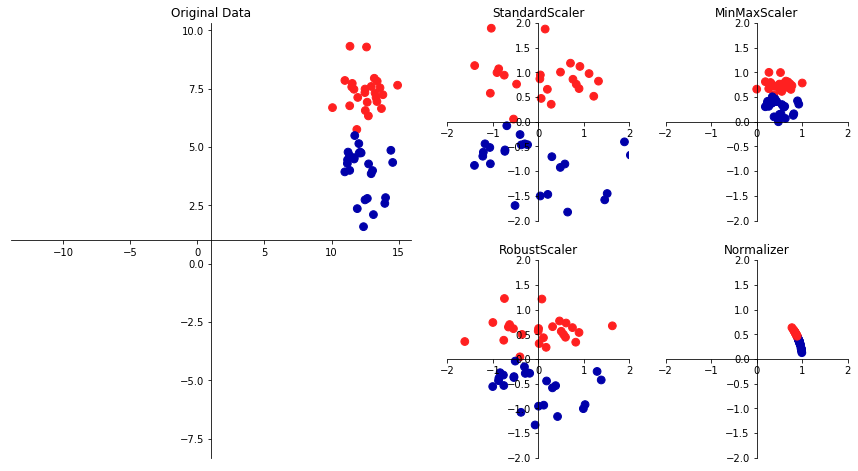

In [2]:
# various scales of data
mglearn.plots.plot_scaling()

* Standard Scaler : 각 특성의 평균을 0, 분산을 1로 정규화
* MinMax Scaler : 모든 특성이 0과 1사이에 위치하도록 변환
* Robust Scaler : 중간값(median)과 사분위 값(quartile)을 사용해 정규화
* Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정 (데이터의 방향, 각도가 중요할 때 많이 사용)

In [3]:
# apply data process to cancer example ( SVM, MinMaxScaler)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
# transform data
x_train_scaled = scaler.transform(x_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력
print("변환된 후 크기: {}".format(x_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n{}".format(x_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(x_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n{}".format(x_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(x_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# transform test data
x_test_scaled = scaler.transform(x_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력
print("스케일 조정 후 특성별 최솟값:\n{}".format(x_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(x_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최솟값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


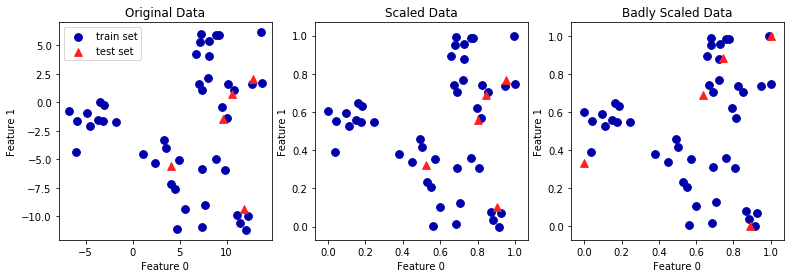

In [7]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
x, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 분할
x_train, x_test = train_test_split(x, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(x_train[:, 0], x_train[:, 1], c=mglearn.cm2(0), label="train set", s=60)
axes[0].scatter(x_test[:, 0], x_test[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# apply MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 스케일이 조정된 데이터의 산점도
axes[1].scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=mglearn.cm2(0), label="train set", s=60)
axes[1].scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 스케일을 따로 조정
# 테스트 세트의 최솟값은 0, 최댓값은 1
# Just for Example. Never use it like this
test_scaler = MinMaxScaler()
test_scaler.fit(x_test)
x_test_scaled_badly = test_scaler.transform(x_test)

# 잘못 조정된 데이터의 산점도
axes[2].scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=mglearn.cm2(0), label="train set", s=60)
axes[2].scatter(x_test_scaled_badly[:, 0], x_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Badly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

##### MinMaxScaler 효과를 확인해봅시다!

In [8]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(x_train, y_train)
print("test set Accuracy: {:.2f}".format(svm.score(x_test, y_test)))

test set Accuracy: 0.63


In [9]:
# MinMax Scaler -> (Scaling into 0 ~ 1)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM TRAINING with scaled data
svm.fit(x_train_scaled, y_train)

# Accuracy of scaled test set
print("Accuracy of Scaled Test Set: {:.2f}".format(svm.score(x_test_scaled, y_test)))

Accuracy of Scaled Test Set: 0.97


In [10]:
# Standard Scaler -> (평균 0, 분산 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM TRAINING with scaled data
svm.fit(x_train_scaled, y_train)

# Accuracy of scaled test set
print("Accuracy of Scaled Test Set: {:.2f}".format(svm.score(x_test_scaled, y_test)))

Accuracy of Scaled Test Set: 0.96


## * Principal Component Analysis, PCA (주성분 분석)

* 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전

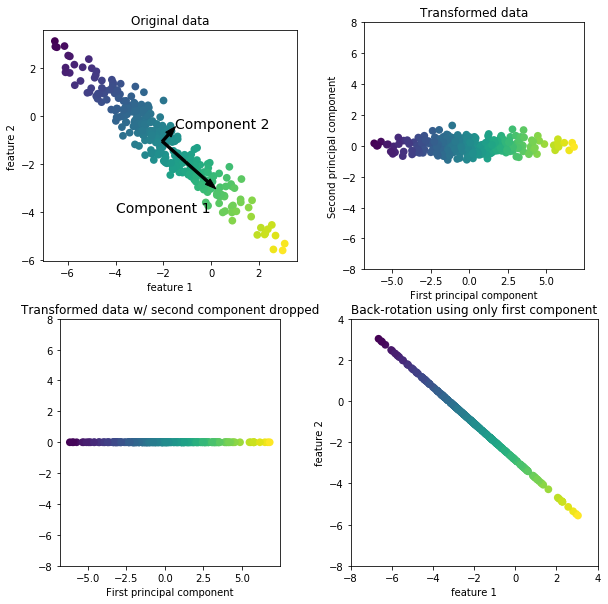

In [11]:
mglearn.plots.plot_pca_illustration()

##### Original Data
- "Component 1" 이라 쓰여있는, 분산이 가장 큰 방향을 갖는다. (이 방향(벡터)가 데이터에서 가장 많은 정보를 담고 있는 방향임)
- 주성분 (Principal Component) : 데이터에 있는 주된 분산의 방향

##### Transformed Data
- 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것

##### Transformed Data w/ second component dropped
- 첫 번째 주성분만 유지

##### Back-rotation using only first component
- 데이터에 다시 평균을 더해 반대로 회전.
- 데이터는 원래의 특성 공간에 놓여있찌만 첫 번째 주성분의 정보만을 담고 있다.
- 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보 시각화하는데 종종 사용

### Visualize Breast-Cancer dataset with PCA

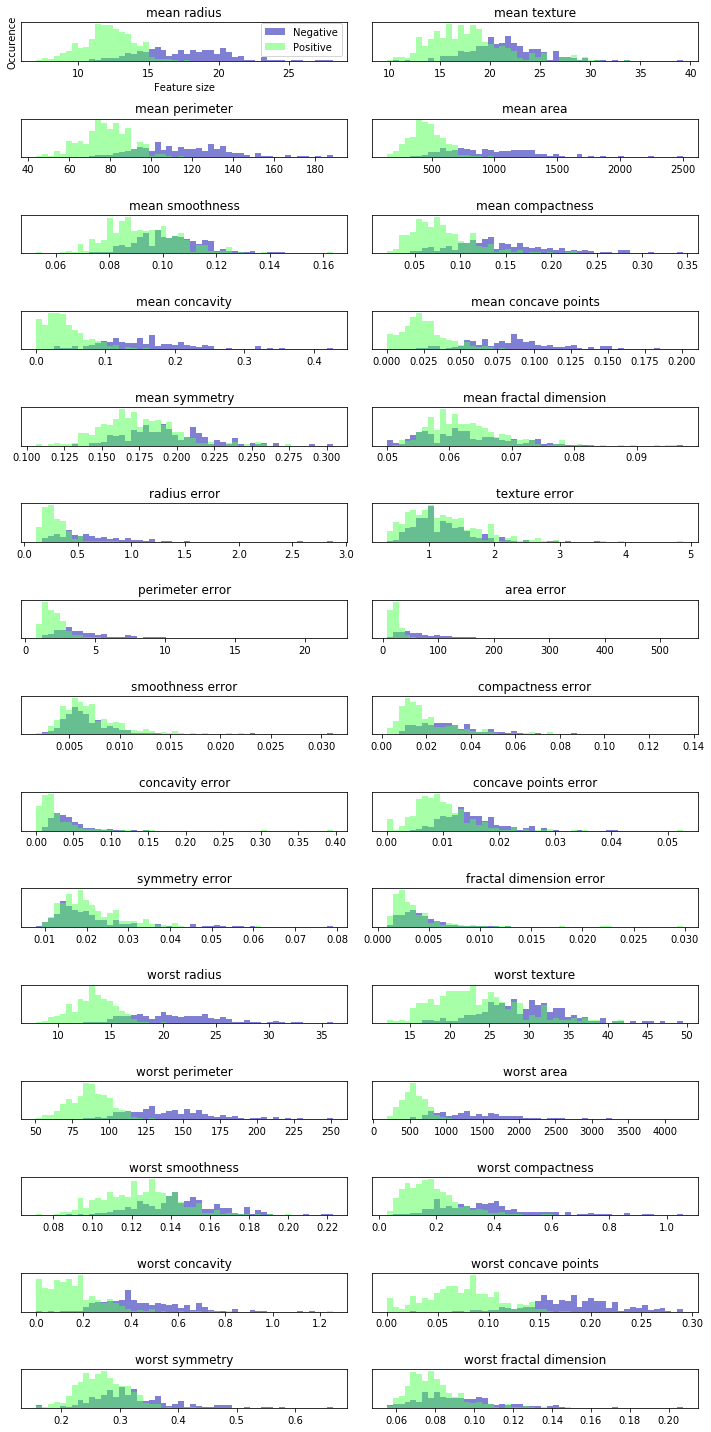

In [12]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature size")
ax[0].set_ylabel("Occurence")
ax[0].legend(["Negative", "Positive"], loc="best")
fig.tight_layout()

* 위 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 전혀 알지 못합니다!!
* 따라서 PCA를 이용해 주요 상호작용을 찾아내고, 이를 2차원 공간에 하나의 산점도로 시각화해봅니다!

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler() # PCA 객체를 생성하고,
scaler.fit(cancer.data) # fit 메서드를 호출해 주성분을 찾고,
x_scaled = scaler.transform(cancer.data) # transform 메서드를 호출해 데이터를 회전시키고 차원을 축소!

In [14]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개의 주성분만 유지
pca = PCA(n_components=2)
# 유방암 데이터로 PCA모델을 만듭시다!
pca.fit(x_scaled)

# 처음 두 개의 주성분을 사용해 데이터 변환
x_pca = pca.transform(x_scaled)
print("original data form: {}".format(str(x_scaled.shape)))
print("scaled data form: {}".format(str(x_pca.shape)))

original data form: (569, 30)
scaled data form: (569, 2)


Text(0,0.5,'Second Principal Component')

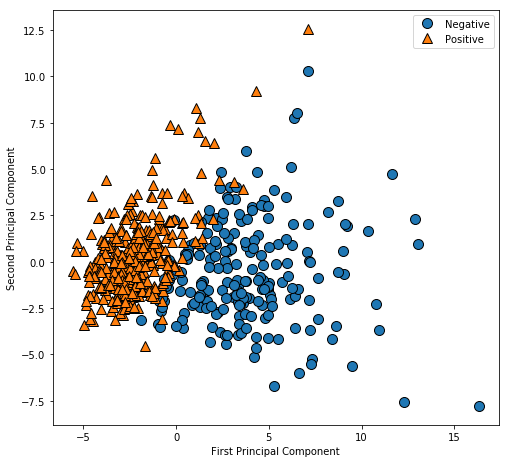

In [15]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅시다!
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.legend(["Negative", "Positive"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

* PCA에서는 두 축을 해석하기가 쉽지 않다.

In [16]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [17]:
print("PCA 주성분:\n{}".format(pca.components_))

PCA 주성분:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal Component')

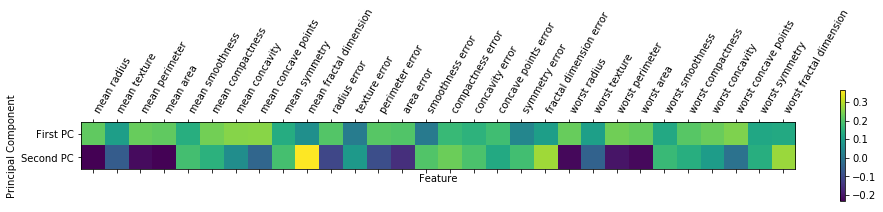

In [18]:
# 처음 두 개의 주성분 히트맵
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First PC", "Second PC"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Component")

#### 고유얼굴(eigenface) 특성 추출
* PCA는 특성 추출에 이용될 수 있다.

AttributeError: targetz_names

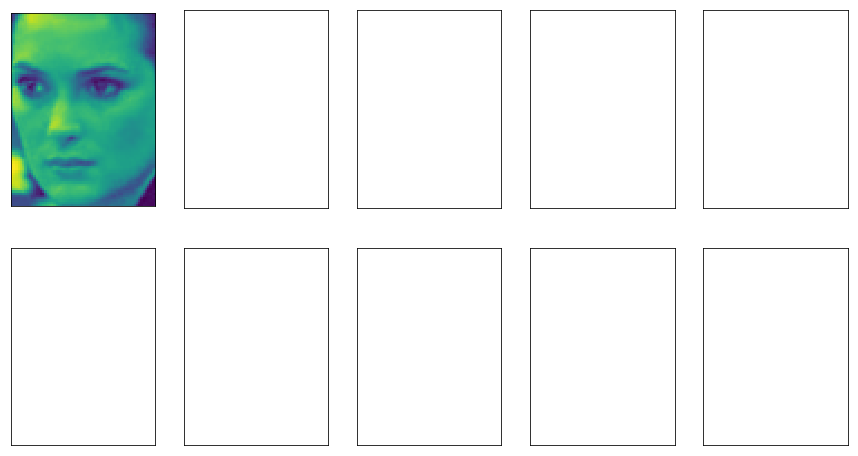

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.targetz_names[target])

In [20]:
# 62명의 얼굴을 찍은 이미지 3023개, 이미지의 크기 == 87 * 65 픽셀
print("people.images.shape: {}".format(people.images.shape))
print("number of Class: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
number of Class: 62


In [21]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
#타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}\t\t{1:3}".format(name, count), end='\t')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo         		 39	Alvaro Uribe             		 35	Amelie Mauresmo          		 21	
Andre Agassi             		 36	Angelina Jolie           		 20	Ariel Sharon             		 77	
Arnold Schwarzenegger    		 42	Atal Bihari Vajpayee     		 24	Bill Clinton             		 29	
Carlos Menem             		 21	Colin Powell             		236	David Beckham            		 31	
Donald Rumsfeld          		121	George Robertson         		 22	George W Bush            		530	
Gerhard Schroeder        		109	Gloria Macapagal Arroyo  		 44	Gray Davis               		 26	
Guillermo Coria          		 30	Hamid Karzai             		 22	Hans Blix                		 39	
Hugo Chavez              		 71	Igor Ivanov              		 20	Jack Straw               		 28	
Jacques Chirac           		 52	Jean Chretien            		 55	Jennifer Aniston         		 21	
Jennifer Capriati        		 42	Jennifer Lopez           		 21	Jeremy Greenstock        		 24	
Jiang Zemin              		 20	John Ashcroft            		 5

* 특정 인물의 사진이 어어ㅓㅓ어어엄청 많으므로 각 인물의 사진 중 50장만 가져옵니다!

In [22]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
x_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1로 조정
x_people = x_people / 255.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# split data in train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)
#이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듦
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(x_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


##### 정확도를 높이기 위해 PCA가 필요하다.
- PCA의 Whitening 옵션을 이용해 주성분의 스케일이 같아지도록 조정
- 화이트닝 옵션 없이 변환 후 StandardScaler를 적용하는 것과 같음

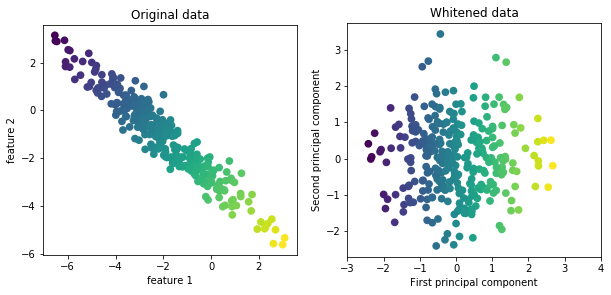

In [24]:
mglearn.plots.plot_pca_whitening()

In [25]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("x_train_pca.shape: {}".format(x_train_pca.shape))

x_train_pca.shape: (1547, 100)


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca, y_train)
print("test set Accuracy: {:.2f}".format(knn.score(x_test_pca, y_test)))

test set Accuracy: 0.31


#### 몇 개의 주성분을 확인해봅시다!
* 이 때 주성분이 나타내는 것은 입력 데이터 공간에서읜 어떤 '방향'

In [27]:
print("pca, component_.shape: {}".format(pca.components_.shape))

pca, component_.shape: (100, 5655)


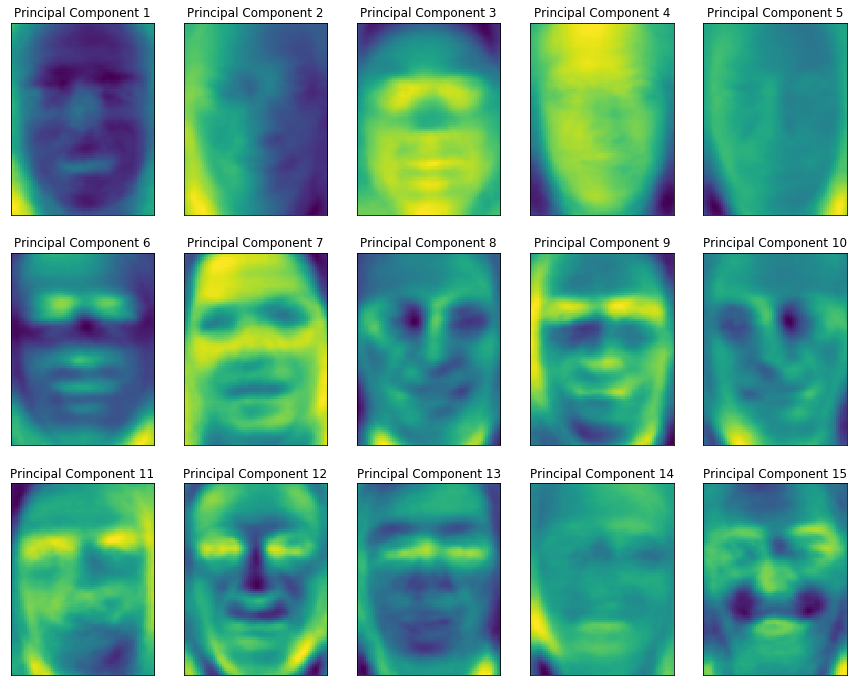

In [28]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("Principal Component {}".format((i + 1)))

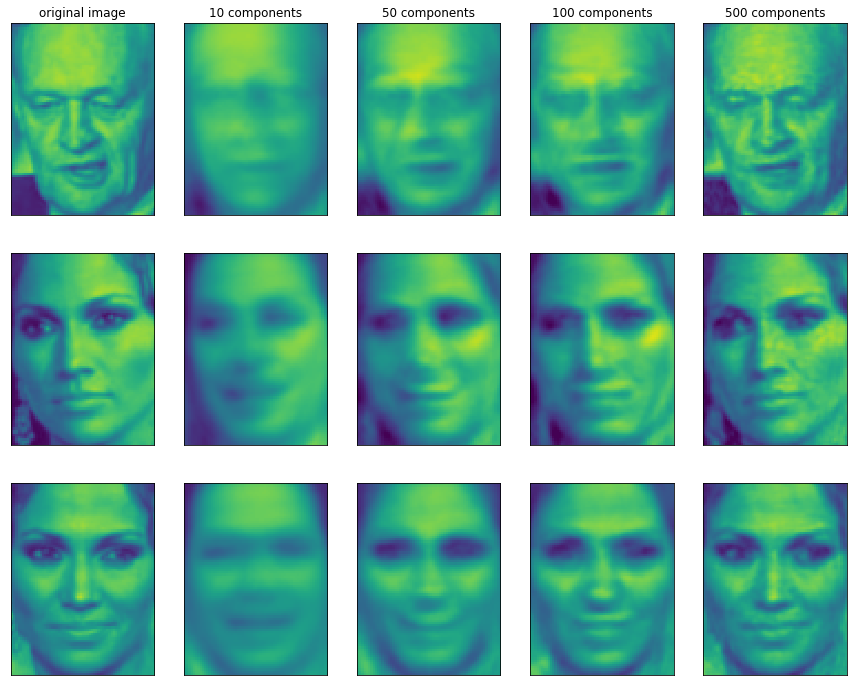

In [29]:
# recover face image
mglearn.plots.plot_pca_faces(x_train, x_test, image_shape)

Text(0,0.5,'Second PC')

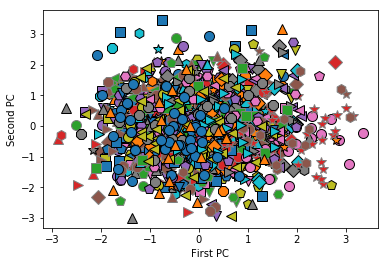

In [30]:
# PCA의 처음 두 성분을 이용해 전체 데이터를 산점도로 나타낸다.
mglearn.discrete_scatter(x_train_pca[:, 0], x_train_pca[:, 1], y_train)
plt.xlabel("First PC")
plt.ylabel("Second PC")

* 두 개의 주성분만 사용했을 때 클래스가 잘 구분되지 않는다.

## * Non-negative Matrix Factorization, NMF (비음수 행렬 분해)

* 데이터에서 음수가 아닌 성분과 계수 값을 찾는다. (음수가 아닌 특성을 가진 데이터에만 적용 가능)
* ex) 사람의 목소리가 담긴 오디오 트랙. 여러 악기로 이루어진 음악 등

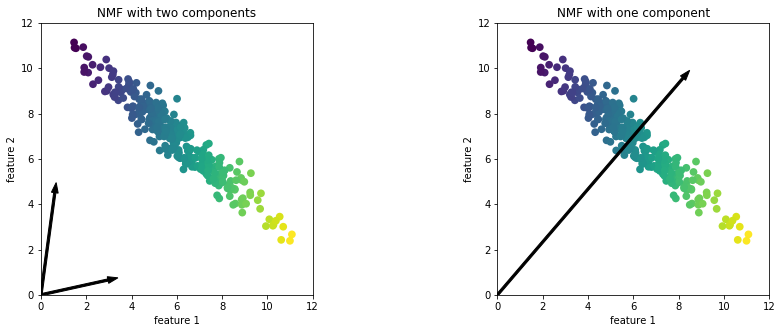

In [31]:
mglearn.plots.plot_nmf_illustration()

* 성분이 두 개일 때와 한 개일 때

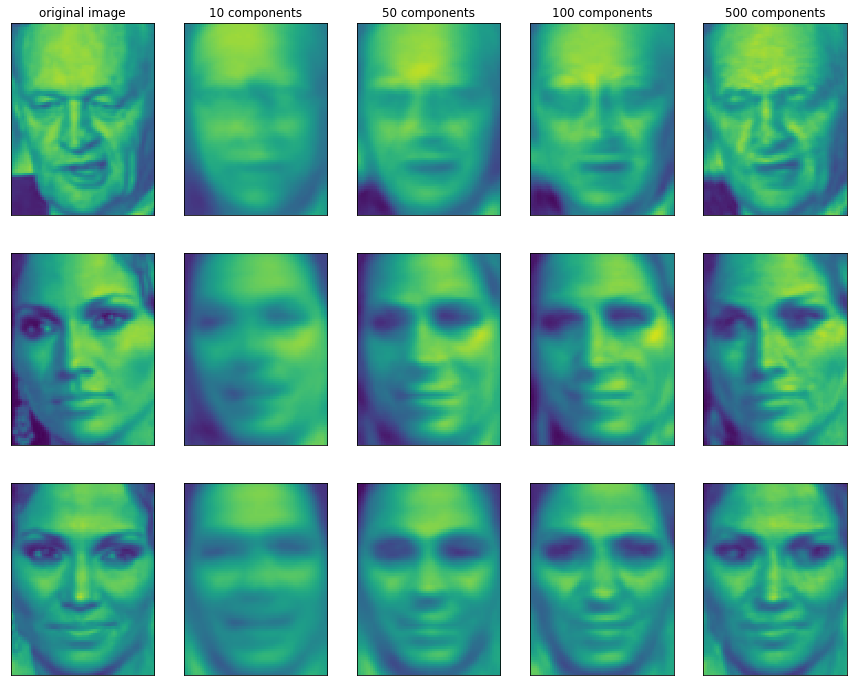

In [39]:
mglearn.plots.plot_nmf_faces(x_train, x_test, image_shape)

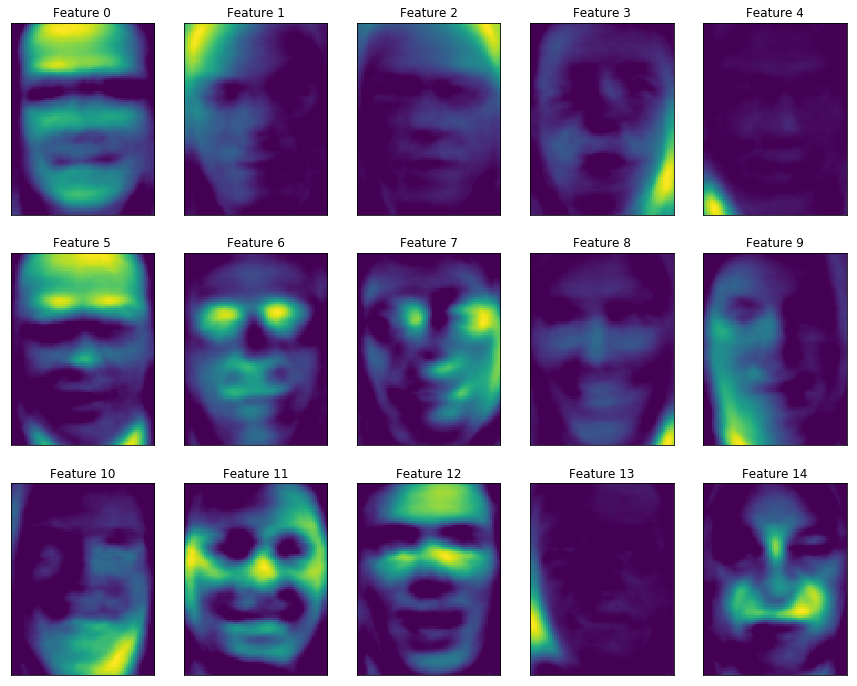

In [35]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(x_train)
x_train_nmf = nmf.transform(x_train)
x_test_nmf = nmf.transform(x_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Feature {}".format(i))

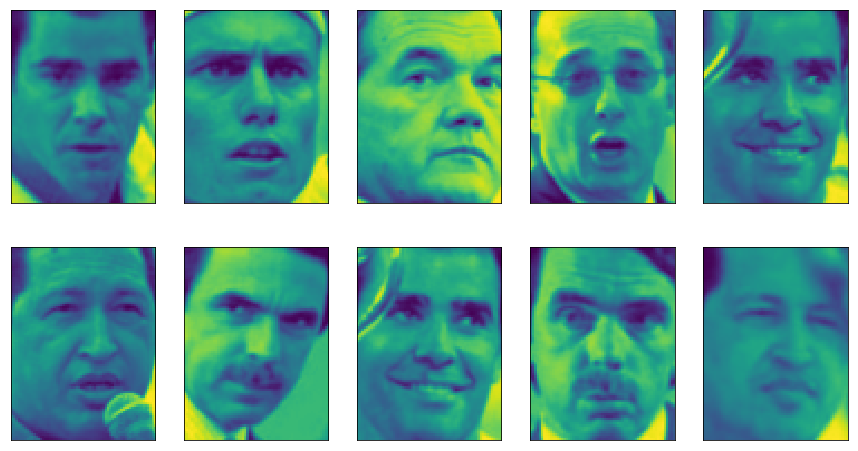

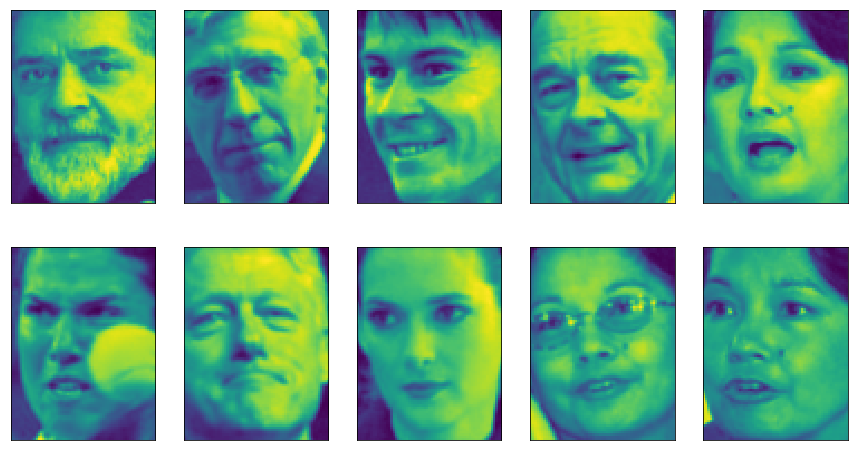

In [38]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력
inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))

* 성분 3의 계수 값이 큰 얼굴들은 오른쪽으로 돌아가 있고, 성분 7의 계수 값이 큰 얼굴들은 왼쪽으로 돌아가 있다.

#### 세 개의 signal이 혼합된 합성 신호 데이터를 분해해서 원본 신호로 복원

Original Signal


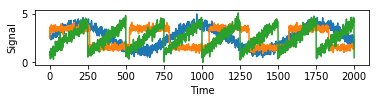

In [49]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
print("Original Signal")

In [43]:
# 원본 데이터를 사용해 100개의 측정 데이터 형성
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


In [44]:
# Resotre Three Signals using NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


In [45]:
# Restore Three Signals using PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

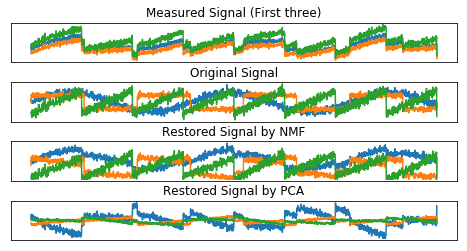

In [48]:
models = [X, S, S_, H]
names = ['Measured Signal (First three)',
         'Original Signal',
         'Restored Signal by NMF',
         'Restored Signal by PCA']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

## Manifold Learning using t-SNE (t-Distributed Stochastic Neighbor Embedding)

* 시각화 알고리즘
* 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는다.

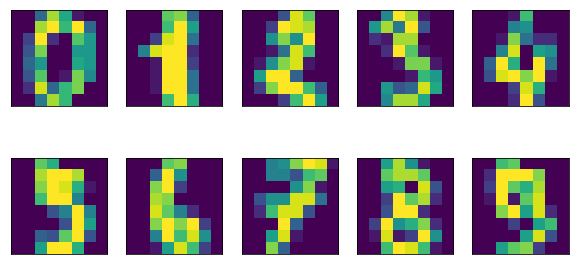

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (),  'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

#### ** PCA 적용

Text(0,0.5,'Second PC')

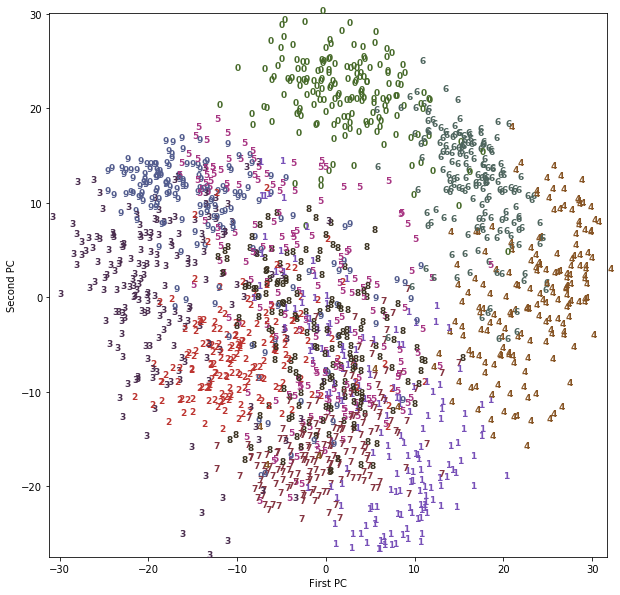

In [58]:
# PCA 모델 생성
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도 그림
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First PC")
plt.ylabel("Second PC")

#### ** t-SNE 적용

Text(0,0.5,'t-SNE Feature 1')

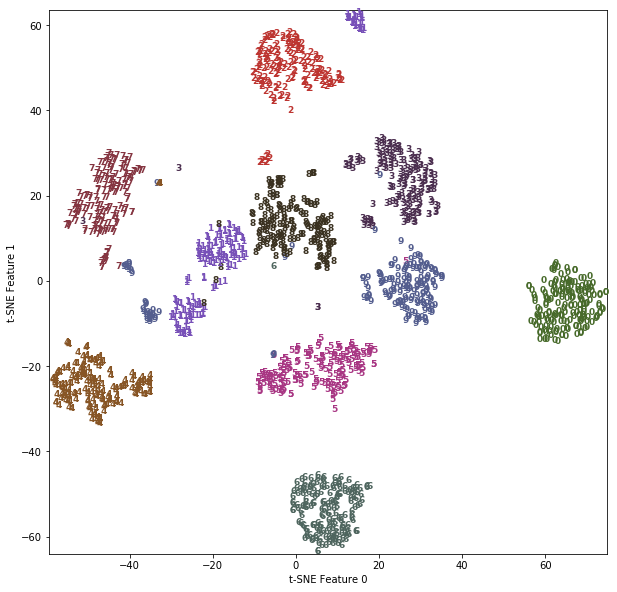

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform 사용
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도 그림
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE Feature 0")
plt.ylabel("t-SNE Feature 1")

### Clustering

* split our dataset into some groups named CLUSTER

#### k-means Cluster

* cluster center : 데이터의 어떤 영역을 대표
* 데이터 포인터를 가장 가까운 cluster center에 할당
* cluster에 할당된 데이터 포인트의 평균으로 cluster center 재지정
* cluster에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료

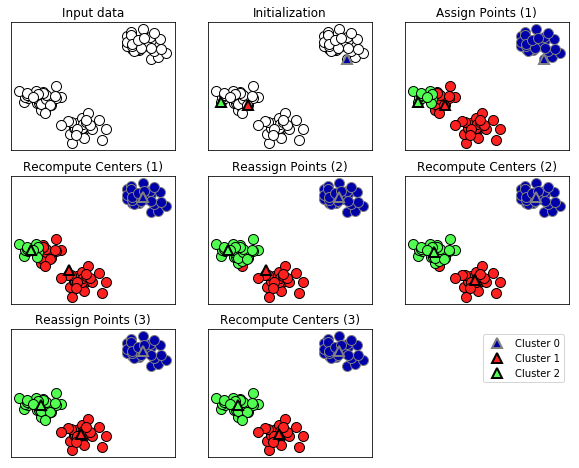

In [61]:
mglearn.plots.plot_kmeans_algorithm()

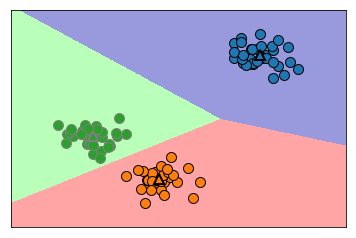

In [62]:
mglearn.plots.plot_kmeans_boundaries()

삼각형이 cluster center.
k-means algorithm으로 찾은 cluster center와 cluster boundaries

In [63]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터 생성
x, y = make_blobs(random_state=1)

# 군집 모델을 만듭시다!
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
# 알고리즘을 적용하면 x에 담긴 각 훈련 데이터 포인트에 cluster label이 할당됨
print("Cluster Label:\n{}".format(kmeans.labels_))

Cluster Label:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
